Random numbers continued:
- numpy has a subpackage numpy.random
- can create a generator with or without a seed
- methods:
    - random - float array of size n between 0 and 1
    - integers - array of n integers between high and low
    - choice - returns a random element of the input array
    - other functions that give different distributions besides the uniform one

Use of random numbers:
- encryption
- generate random events like poker hands for online gambling
- generate random events for physics uses like modeling radioactive decay

Radioactive decay example:
- in supernova, most light comes from decay of unstable isotopes such as nickel-56 decaying to cobalt and then iron
- sample of 1000 nickel-56 atoms
- on average, radioactive decay is exponential with a given half-life, but that doesn't tell us which atoms decay when and the half-life is only true on average across many samples
- see slides for equation of decay and also probability of a given atom decaying in a specific time range

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [5]:
#constants
NNi=1000 #start with 1000 nickel atoms
NCo=0 # and zero cobalt atoms
NFe=0
tauNi=6.075*24 #half life of nickel-56 in hours
tauCo=77.236*24 #half life of cobalt-56 in hours
h=1.0 #time step in hours
pNi=1-2**(-h/tauNi) #probability of nickel decay in one step
pCo=1-2**(-h/tauCo) #probability of cobalt decay in one step
tmax=2000 #total time

In [6]:
#plot points
tpoints=np.arange(0,tmax,h)
Nipoints=[]
Copoints=[]
Fepoints=[]

In [7]:
for t in tpoints:
    Nipoints.append(NNi)
    Copoints.append(NCo)
    Fepoints.append(NFe)

    #calculate the number of cobalt atoms that decay during this time step
    Codecay=0
    for i in range(NCo):
        if random()<pCo:
            Codecay+=1

    #calculate the number of nickel atoms that decay during this time step
    Nidecay=0
    for i in range(NNi):
        if random()<pNi:
            Nidecay+=1

    #update quantities
    NNi-=Nidecay
    NCo+=Nidecay
    NCo-=Codecay
    NFe+=Codecay

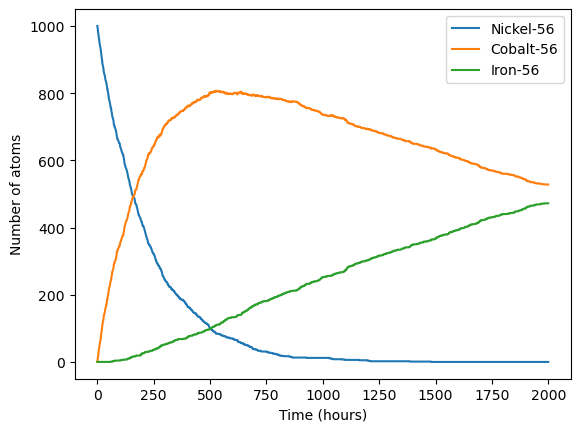

In [8]:
plt.plot(tpoints,Nipoints,label='Nickel-56')
plt.plot(tpoints,Copoints,label='Cobalt-56')
plt.plot(tpoints,Fepoints,label='Iron-56')
plt.xlabel('Time (hours)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

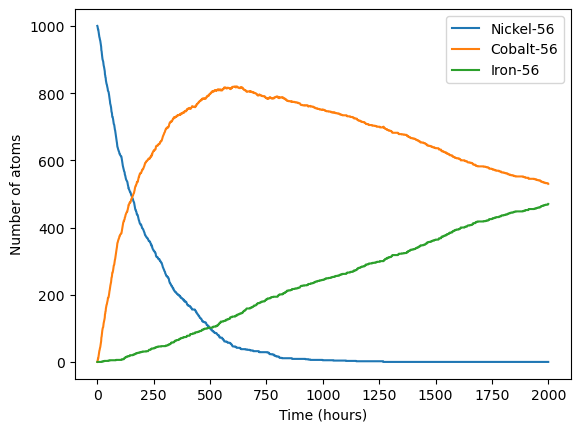

In [23]:
# vectorized version
NNi=1000 #start with 1000 nickel atoms
NCo=0 # and zero cobalt atoms
NFe=0
#plot points
tpoints=np.arange(0,tmax,h)
Nipoints=[]
Copoints=[]
Fepoints=[]

for t in tpoints:
    Nipoints.append(NNi)
    Copoints.append(NCo)
    Fepoints.append(NFe)

    #calculate the number of cobalt atoms that decay during this time step
    Codecay=np.sum(np.random.rand(NCo)<pCo)

    #calculate the number of nickel atoms that decay during this time step
    Nidecay=np.sum(np.random.rand(NNi)<pNi)

    #update quantities
    NNi-=Nidecay
    NCo+=Nidecay
    NCo-=Codecay
    NFe+=Codecay

plt.plot(tpoints,Nipoints,label='Nickel-56')
plt.plot(tpoints,Copoints,label='Cobalt-56')
plt.plot(tpoints,Fepoints,label='Iron-56')
plt.xlabel('Time (hours)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

Monte Carlo method:
- note that the two plots are actually different! and they will be slightly different each time they run unless you use a seed
- can think of this as a numerical experiment and the experiment can be repeated and then get average likelihoods
- the basic idea is that many things are hard to determine the probability of theoretically, but just running a bunch of Monte Carlo simulations and then averaging them works
- this was developed as part of the Manhattan project since they wanted to model neutron diffusion in fissile material
- the example we just did was possible to do with only probability theory but let's make it more complicated now with two radioactive decay channels

In [93]:
#constants
NBi=10000 #start with 10000 bismuth-212 atoms
NTl=0 # thallium-208
NPo=0 #polonium-212
NPb=0 #lead-208
tauBi=60.55*60 #half life of bismuth-212 in seconds
tauTl=3.053*60 #half life of thallium-208 in seconds
tauPo=0.299*1e-6 #half life of polonium-212 in seconds
h=1.0 #time step in seconds
pBi=1-2**(-h/tauBi) #probability of bismuth decay in one step
pTl=1-2**(-h/tauTl) #probability of thallium decay in one step
pPo=1-2**(-h/tauPo) #probability of polonium decay in one step
tmax=20000 #total time in seconds
BitoPo=0.6406 #when bismuth decays, the probability that it decays to polonium

In [95]:
#plot points
tpoints=np.arange(0,tmax,h)
Bipoints=[]
Tlpoints=[]
Popoints=[]
Pbpoints=[]

In [97]:
for t in tpoints:
    Bipoints.append(NBi)
    Tlpoints.append(NTl)
    Popoints.append(NPo)
    Pbpoints.append(NPb)

    #calculate the number of thallium atoms that decay during this time step
    Tldecay=np.sum(np.random.rand(NTl)<pTl)
    NTl-=Tldecay
    NPb+=Tldecay

    #calculate the number of polonium atoms that decay during this time step
    Podecay=np.sum(np.random.rand(NPo)<pPo)
    NPo-=Podecay
    NPb+=Tldecay

    #calculate the number of bismuth atoms that decay
    Bidecay=np.sum(np.random.rand(NBi)<pBi)
    NBi-=Bidecay
    #now calculate the split between those two
    BitoPodecay=np.sum(np.random.rand(Bidecay)<BitoPo)
    NPo+=BitoPodecay
    NTl+=(Bidecay-BitoPodecay)

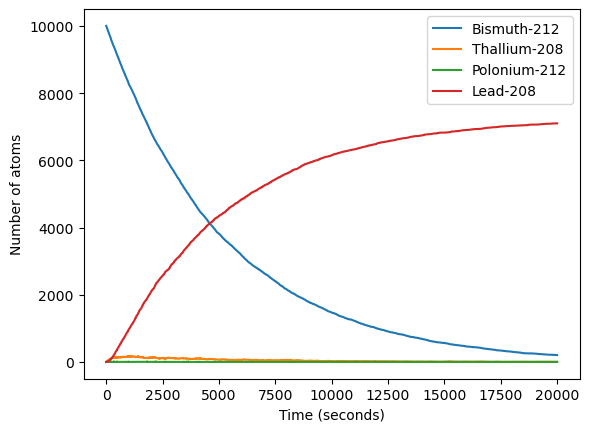

In [99]:
plt.plot(tpoints,Bipoints,label='Bismuth-212')
plt.plot(tpoints,Tlpoints,label='Thallium-208')
plt.plot(tpoints,Popoints,label='Polonium-212')
plt.plot(tpoints,Pbpoints,label='Lead-208')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

Nonuniform random numbers:
- would be more efficient to figure out when each atom decays instead of checking every time step if it did decay
- need to pull from the probability distribution of that instead of from a uniform one
- use a transformation method to get that probability distribution from a uniform one
- see slides for the math behind how this works